In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from dolo import *

In [10]:
filename =  'https://raw.githubusercontent.com/EconForge/dolo/master/examples/models/rbc_taxes.yaml'

In [28]:
model = yaml_import(filename)

The model defined in `rbc_taxes.yaml` is the `rbc` model, with an agregate tax `g` that is proportional to income. 

In [29]:
model.calibration

CalibrationDict([('states', array([ 1.        ,  9.35497829,  0.        ])),
                 ('controls', array([ 0.23387446,  0.33      ])),
                 ('shocks', array([ 0.])),
                 ('parameters',
                  array([ 0.99      ,  1.        ,  1.        ,  8.04277482,  0.025     ,
                          0.33      ,  0.8       ,  1.        ])),
                 ('auxiliaries',
                  array([ 0.76118369,  0.03510101,  0.99505814,  2.02026956]))])

In [30]:
model.residuals()

OrderedDict([('transition', array([ 0.,  0.,  0.])),
             ('arbitrage', array([  0.00000000e+00,  -8.88178420e-16])),
             ('auxiliary',
              array([ -1.11022302e-16,   0.00000000e+00,   0.00000000e+00,
                       0.00000000e+00]))])

We want to compute the adjustment of the economy when this tax, goes back progressively from 10% to 0%, over 10 periods.

In [31]:
exo_g = linspace(0.1,0,10) # this is a vector of size 10
exo_g = atleast_2d(exo_g).T # the solver expects a 1x10 vector
print(exo_g.shape)

(10, 1)


In [32]:
exo_g

array([[ 0.1       ],
       [ 0.08888889],
       [ 0.07777778],
       [ 0.06666667],
       [ 0.05555556],
       [ 0.04444444],
       [ 0.03333333],
       [ 0.02222222],
       [ 0.01111111],
       [ 0.        ]])

In [33]:
# Let's solve for the optimal adjustment by assuming that the
# economy returns to steady-state after T=50 periods.
from dolo.algos.dtcscc.perfect_foresight import deterministic_solve
sim = deterministic_solve(model, shocks=exo_g, T=50)
display(sim) # it returns a timeseries object

,z,k,g,i,n,c,rk,y,w,e_g
0,1.0,9.354978,0.000000e+00,0.258167,0.334828,0.746621,0.035444,1.004788,2.010610,0.088889
1,1.0,9.379270,8.888889e-02,0.170209,0.334970,0.746837,0.035393,1.005935,2.012049,0.077778
2,1.0,9.314998,7.777778e-02,0.177389,0.334298,0.747138,0.035508,1.002305,2.008820,0.066667
3,1.0,9.259512,6.666667e-02,0.184907,0.333677,0.747512,0.035606,0.999086,2.006093,0.055556
4,1.0,9.212932,5.555556e-02,0.192797,0.333115,0.747946,0.035687,0.996298,2.003872,0.044444
5,1.0,9.175405,4.444444e-02,0.201092,0.332617,0.748425,0.035749,0.993961,2.002162,0.033333
6,1.0,9.147112,3.333333e-02,0.209827,0.332192,0.748937,0.035792,0.992097,2.000968,0.022222
7,1.0,9.128262,2.222222e-02,0.219039,0.331845,0.749467,0.035816,0.990729,2.000295,0.011111
8,1.0,9.119095,1.111111e-02,0.228766,0.331585,0.750002,0.035822,0.989879,2.000151,0.000000
9,1.0,9.119884,-1.524151e-20,0.239047,0.331418,0.750526,0.035807,0.989573,2.000541,0.000000


In [34]:
model


Model object:
------------

- name: "taxes"
- type: "dtcscc"
- file: "<string>

- residuals:

    transition
        1   : 0.0000 : z = (1-rho)*zbar + rho*z(-1)
        2   : 0.0000 : k = (1-delta)*k(-1) + i(-1)
        3   : 0.0000 : g = e_g

    arbitrage
        1   : 0.0000 : 1 - beta*(c/c(1))**(sigma)*(1-delta+rk(1))    | 0 <= i <= inf
        2   : 0.0000 : chi*n**eta*c**sigma - w                        | 0 <= n <= inf


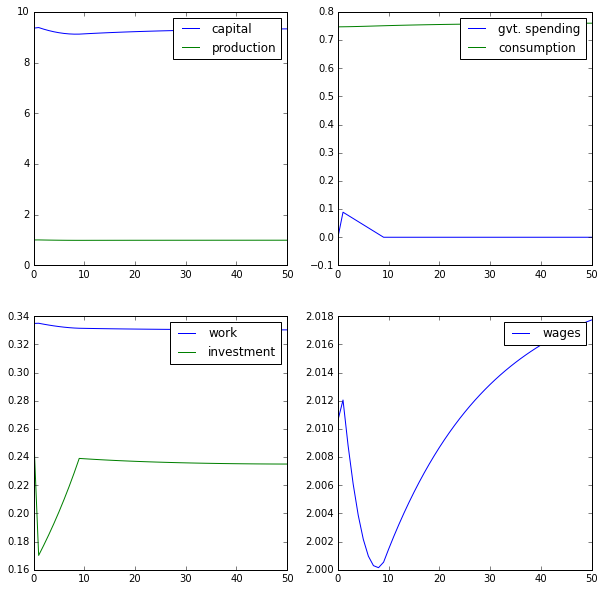

In [35]:
figsize(10,10)
subplot(221)
plot(sim['k'], label='capital')
plot(sim['y'], label='production')
legend()
subplot(222)
plot(sim['g'], label='gvt. spending')
plot(sim['c'], label='consumption')
legend()
subplot(223)
plot(sim['n'], label='work')
plot(sim['i'], label='investment')
legend()
subplot(224)
plot(sim['w'], label='wages')
legend()